In [2]:
# https://www.kaggle.com/code/sishihara/upura-kaggle-tutorial-02-overview/notebook
import numpy as np
import pandas as pd

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
gender_submission = pd.read_csv("./gender_submission.csv")

In [3]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
train.head()
# Name, Sex, Ticket, Cabin, Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [2]:
data = pd.concat([train, test], sort=False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(len(train), len(test), len(data))

891 418 1309


In [8]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## 特徴量エンジニアリング

In [9]:
data['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [11]:
data['Sex'].replace(['male','female'], [0, 1], inplace=True)
print(data['Sex'])

0      0
1      1
2      1
3      1
4      0
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 1309, dtype: int64


In [12]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map( {'S':0, 'C':1, 'Q':2} ).astype(int)
print(data['Embarked'])

0      0
1      1
2      0
3      0
4      0
      ..
413    0
414    1
415    0
416    0
417    1
Name: Embarked, Length: 1309, dtype: int32


In [14]:
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
print(data['Fare'])

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 1309, dtype: float64


In [15]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()

data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

In [16]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

In [4]:
train = data[:len(train)]
test = data[len(train):]

In [5]:
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [19]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)
clf.fit(X_train, y_train)

c:\Users\nakamura\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(random_state=0, solver='sag')

In [22]:
y_pred = clf.predict(X_test)
y_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.])

In [24]:
sub = pd.DataFrame(pd.read_csv('./test.csv')['PassengerId'])
sub['Survived'] = list(map(int, y_pred))
sub.to_csv('submission.csv', index=False)

## 3. ここで差がつく！ 仮説に基づいて新しい特徴量を作ってみよう

In [5]:
data['Age'].fillna(data['Age'].median(), inplace=True)

c:\Users\nakamura\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

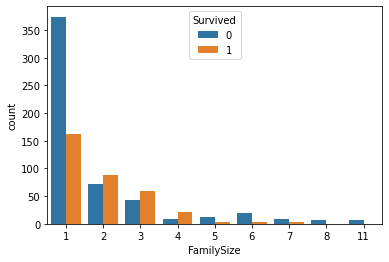

In [6]:
import seaborn as sns

data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][:len(train):]
sns.countplot(x='FamilySize', data=train, hue='Survived')

In [ ]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1
train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

## 4. 勾配ブースティングが最強？！ いろいろな機械学習アルゴリズムを使ってみよう

In [9]:
data = pd.concat([train, test], sort=False)
data.head()

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
# X_train = train.drop('Survived', axis=1)
X_train = X_train[['PassengerId','Sex','Age','SibSp','Parch','Fare']]
X_test = test.drop('Survived', axis=1)



In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=0, stratify=y_train)

In [11]:
categorical_features =['Embarked','Pclass','Sex']

In [13]:
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categorical_features)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, categorical_feature=categorical_features)

params = {
    'objective': 'binary'
}

model = lgb.train(
    params, lgb_train,
    valid_sets=[lgb_train, lgb_eval],
    verbose_eval=10,
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(10)]
)

y_pred = model.predict(X_test, num_iteration=model.best_iteration)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Name, Sex, Ticket, Cabin, Embarked

In [ ]:
y_pred[:10]